In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
xvar = np.random.randint(1, 11, size=100) # Generate random data for xvar
yvar = xvar.copy() # Copy the 100 values of xvar in to yvar
# Replace 50 values of yvar as same as the xvar and replace the other 50 values of yvar to be different from xvar
yvar[np.random.choice(100, 50)] = np.random.randint(1, 11, size=50)
zvar = yvar.copy() # Copy the 100 values of yvar in to zvar
# Replace 50 values of zvar as same as the yvar and replace the other 50 values of zvar to be different from yvar
zvar[np.random.choice(100, 50)] = np.random.randint(1, 11, size=50)
my_vars = np.column_stack((xvar, yvar, zvar)) # Bind xvar, yvar and zvar together

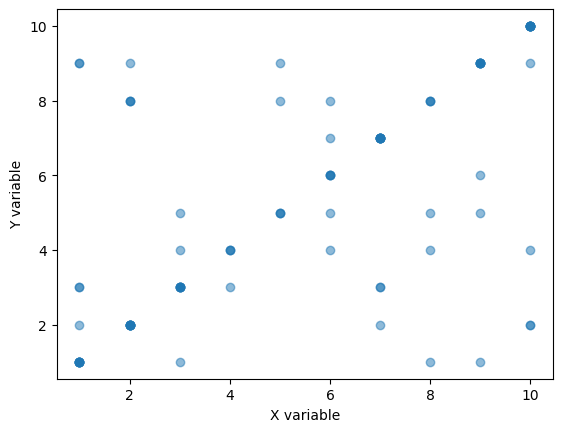

[[1.         0.63882377 0.36737881]
 [0.63882377 1.         0.5557172 ]
 [0.36737881 0.5557172  1.        ]]


In [3]:
# bivariate plot and correlation matrix between xvar and yvar
plt.plot(xvar, yvar, 'o', alpha=0.5)
plt.xlabel('X variable')
plt.ylabel('Y variable')
plt.show()

corr_mat = np.corrcoef(np.column_stack((xvar, yvar, zvar)), rowvar=False)
print(corr_mat)

In [4]:
# Perform Principal Component Analysis
my_vars = pd.DataFrame(my_vars)
scaler = StandardScaler()
my_vars_std = scaler.fit_transform(my_vars)

pca = PCA()
my_pca = pca.fit_transform(my_vars_std)
print(pd.DataFrame(my_pca, columns=['PC1', 'PC2', 'PC3']))

         PC1       PC2       PC3
0  -1.827825 -0.003956 -0.080402
1  -2.386892  0.035338 -0.112880
2   2.644707 -0.318309  0.179417
3   1.526574 -0.239721  0.114462
4   2.644707 -0.318309  0.179417
..       ...       ...       ...
95  0.038170  1.735129 -0.019942
96 -0.709692 -0.082544 -0.015448
97 -2.386892  0.035338 -0.112880
98 -1.827825 -0.003956 -0.080402
99  0.996449 -0.820179 -0.387144

[100 rows x 3 columns]


In [5]:
# Get the correlation matrix of the principal components
pc_corr = np.corrcoef(my_pca, rowvar=False)
print(pc_corr)

[[1.00000000e+00 1.55573851e-16 3.82552674e-17]
 [1.55573851e-16 1.00000000e+00 1.16221828e-16]
 [3.82552674e-17 1.16221828e-16 1.00000000e+00]]


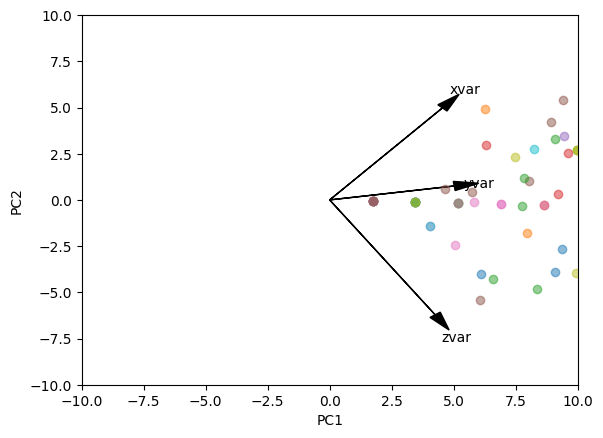

In [6]:
# Plot biplot for components PC1 and PC2
fig, ax = plt.subplots()

for i, var in enumerate(['xvar', 'yvar', 'zvar']):
    ax.arrow(0, 0, 8*pca.components_[0, i], 8*pca.components_[1, i],
             head_width=0.5, head_length=1, fc='k', ec='k')
    ax.text(pca.components_[0, i] * 9.6, pca.components_[1, i] * 9.6,
            var, ha='center', va='center')

for i in range(my_vars.shape[0]):
    ax.scatter(pca.transform(my_vars)[i, 0], pca.transform(my_vars)[i, 1], alpha=0.5)
    
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
plt.show()

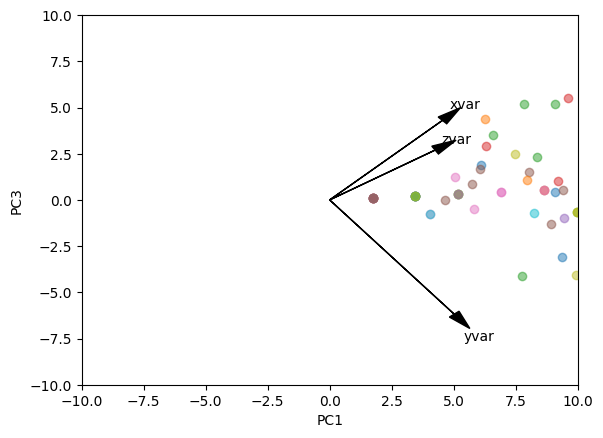

In [7]:
# Plot biplot for components PC1 and PC3
fig, ax = plt.subplots()

for i, var in enumerate(['xvar', 'yvar', 'zvar']):
    ax.arrow(0, 0, 8*pca.components_[0, i], 8*pca.components_[2, i],
             head_width=0.5, head_length=1, fc='k', ec='k')
    ax.text(pca.components_[0, i] * 9.6, pca.components_[2, i] * 9.6,
            var, ha='center', va='center')

for i in range(my_vars.shape[0]):
    ax.scatter(pca.transform(my_vars)[i, 0], pca.transform(my_vars)[i, 2], alpha=0.5)
    
ax.set_xlabel('PC1')
ax.set_ylabel('PC3')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
plt.show()

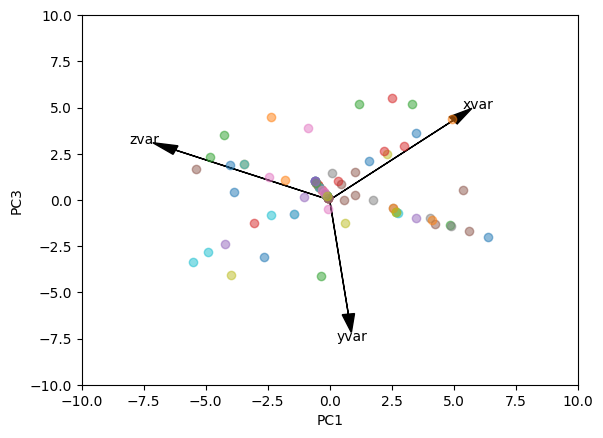

In [8]:
# Plot biplot for components PC2 and PC3
fig, ax = plt.subplots()

for i, var in enumerate(['xvar', 'yvar', 'zvar']):
    ax.arrow(0, 0, 8*pca.components_[1, i], 8*pca.components_[2, i],
             head_width=0.5, head_length=1, fc='k', ec='k')
    ax.text(pca.components_[1, i] * 9.6, pca.components_[2, i] * 9.6,
            var, ha='center', va='center')

for i in range(my_vars.shape[0]):
    ax.scatter(pca.transform(my_vars)[i, 1], pca.transform(my_vars)[i, 2], alpha=0.5)
    
ax.set_xlabel('PC1')
ax.set_ylabel('PC3')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
plt.show()

In [9]:
# Perform PCA on the brand perception dataset
# load the data
brand_ratings = pd.read_csv("http://goo.gl/IQl8nc")
print(brand_ratings.describe())

           perform       leader       latest         fun      serious  \
count  1000.000000  1000.000000  1000.000000  1000.00000  1000.000000   
mean      4.488000     4.417000     6.195000     6.06800     4.323000   
std       3.203454     2.608432     3.078059     2.74425     2.778199   
min       1.000000     1.000000     1.000000     1.00000     1.000000   
25%       1.000000     2.000000     4.000000     4.00000     2.000000   
50%       4.000000     4.000000     7.000000     6.00000     4.000000   
75%       7.000000     6.000000     9.000000     8.00000     6.000000   
max      10.000000    10.000000    10.000000    10.00000    10.000000   

           bargain       value       trendy        rebuy  
count  1000.000000  1000.00000  1000.000000  1000.000000  
mean      4.259000     4.33700     5.220000     3.727000  
std       2.667027     2.39858     2.742101     2.544592  
min       1.000000     1.00000     1.000000     1.000000  
25%       2.000000     2.00000     3.000000    

In [10]:
# On the raw data always remember to scale the data by subtracting the data points by its mean
# and dividing it by its standard deviation
# Now let us transform the brand data
scaler = StandardScaler()
brand_sc = brand_ratings.copy()
brand_sc.iloc[:, :9] = scaler.fit_transform(brand_ratings.iloc[:, :9])
print(brand_sc.describe())

            perform        leader        latest           fun       serious  \
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean  -1.563194e-16  8.526513e-17 -1.136868e-16  1.421085e-16 -5.684342e-17   
std    1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00   
min   -1.089370e+00 -1.310638e+00 -1.688596e+00 -1.847695e+00 -1.196697e+00   
25%   -1.089370e+00 -9.270741e-01 -7.134685e-01 -7.539528e-01 -8.365716e-01   
50%   -1.524118e-01 -1.599462e-01  2.616593e-01 -2.479148e-02 -1.163205e-01   
75%    7.845460e-01  6.071818e-01  9.117445e-01  7.043698e-01  6.039305e-01   
max    1.721504e+00  2.141438e+00  1.236787e+00  1.433531e+00  2.044433e+00   

            bargain         value        trendy         rebuy  
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  
mean  -1.136868e-16  1.136868e-16  9.947598e-17  4.263256e-17  
std    1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00  
min   -1.222571e+00 -1.391936e+0

<AxesSubplot:>

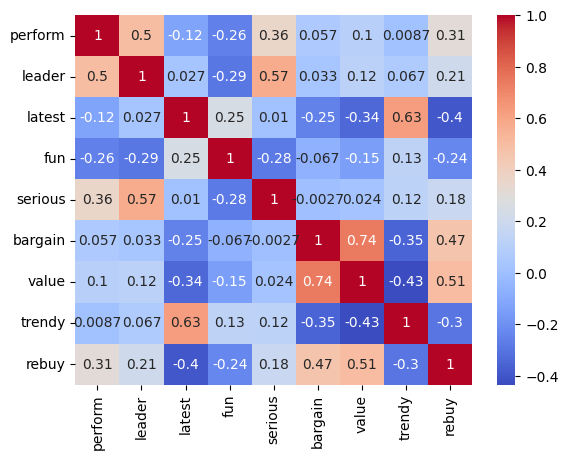

In [11]:
# Now let us look at the correlation matrix
corr_matrix = brand_sc.iloc[:, :9].corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)

In [12]:
# Now let us perform the PCA
## PCA for brand ratings
brand_pc = PCA(n_components=9)
brand_pc.fit_transform(brand_sc.iloc[:, :9])
print(pd.DataFrame({'Variance': brand_pc.explained_variance_ratio_,
                    'PC': np.arange(1, 10)}))

   Variance  PC
0  0.331033   1
1  0.232950   2
2  0.119917   3
3  0.080801   4
4  0.070838   5
5  0.059427   6
6  0.043345   7
7  0.034672   8
8  0.027016   9


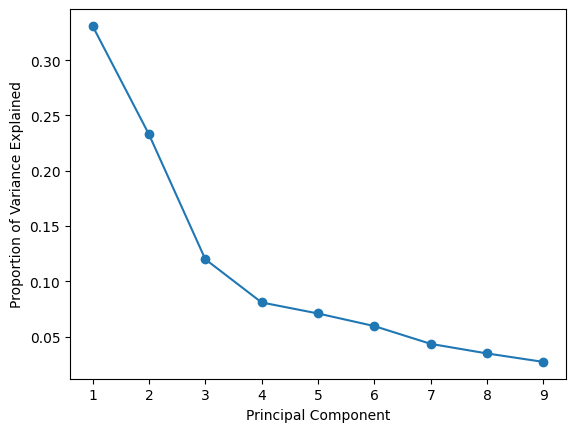

In [13]:
# To address the question of how many components to choose for modeling the brand
# perception dataset, we can use the Scree plot
plt.plot(np.arange(1, 10), brand_pc.explained_variance_ratio_, '-o')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [14]:
# Here we see that the plot levels out at 3. So, we will choose the first three principal components.
brand_pc = PCA(n_components=3)
brand_pc.fit_transform(brand_sc.iloc[:, :9])
print(pd.DataFrame({'Variance': brand_pc.explained_variance_ratio_,
                    'PC': np.arange(1, 4)}))

   Variance  PC
0  0.331033   1
1  0.232950   2
2  0.119917   3


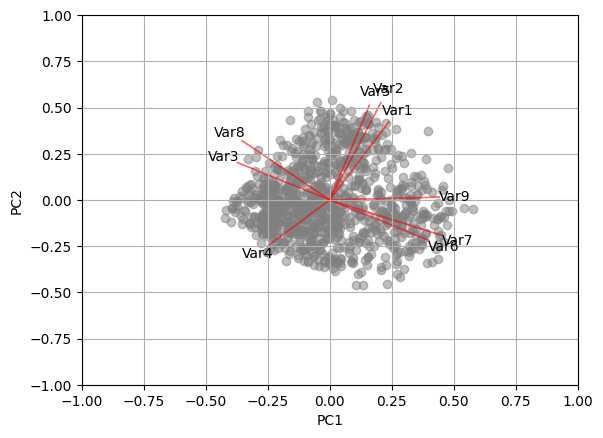

In [15]:
# biplot to visualize - Perceptual map
def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c='gray', alpha=0.5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0]* 1.15, coeff[i, 1] * 1.15, "Var"+str(i+1), color='black', ha='center', va='center')
        else:
            plt.text(coeff[i, 0]* 1.15, coeff[i, 1] * 1.15, labels[i], color='black', ha='center', va='center')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

biplot(brand_pc.transform(brand_sc.iloc[:, :9]), np.transpose(brand_pc.components_))

    perform    leader    latest       fun   serious   bargain     value  \
a -0.886362 -0.528168  0.411179  0.656974 -0.919400  0.214203  0.184785   
b  0.931336  1.071294  0.726470 -0.972701  1.183733  0.041640  0.151415   
c  0.650249  1.163350 -0.102388 -0.845098  1.223346 -0.607347 -0.440898   
d -0.680231 -0.593373  0.352671  0.186665 -0.692521 -0.881197 -0.933102   
e -0.564673  0.192933  0.456685  0.296039  0.042135  0.551826  0.418373   
f -0.058716  0.269645 -1.262790 -0.218019  0.589525  0.874444  1.023200   
g  0.918843 -0.167617 -1.285543 -0.516975 -0.534066  0.896953  1.256789   
h -0.014991 -0.298029  0.502191  0.715307 -0.141529 -0.738645 -0.782938   
i  0.334806 -0.321043  0.355922  0.412705 -0.148732 -0.254718 -0.803794   
j -0.630260 -0.788991 -0.154395  0.285102 -0.602490 -0.097160 -0.073831   

     trendy     rebuy  
a -0.525407 -0.596465  
b  0.740679  0.237092  
c  0.025541 -0.132504  
d  0.737030 -0.494236  
e  0.138649  0.036566  
f -0.813652  1.357675  
g -1.2

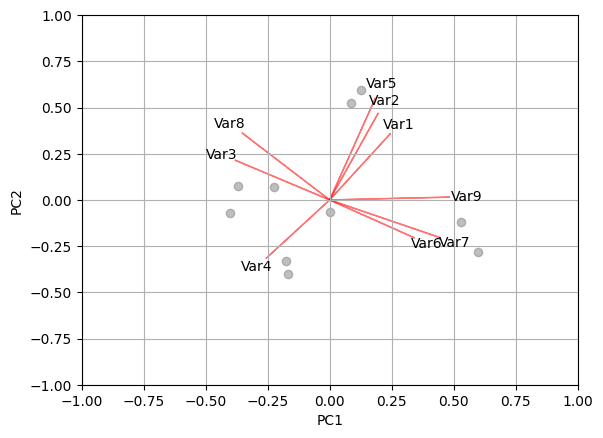

In [16]:
# The above plot looks very cluttered so let us aggregate the instances to establish the mean ratings
# for each perceptual attribute across each brand
# aggregate each perceptual attribute by brand
brand_mean = brand_sc.groupby('brand').mean()

# use brand for the row names
brand_mean.index.name = None

# Display the brand means
print(brand_mean)

# Now let us perform PCA on the brand.mean dataset
brand_mu_pc = PCA().fit(brand_mean)
print(pd.DataFrame(brand_mu_pc.components_,columns=brand_mean.columns))

# Now let us create a biplot to visualize - Perceptual map
biplot(brand_mu_pc.transform(brand_mean.iloc[:, :9]), np.transpose(brand_mu_pc.components_))

In [17]:
print(brand_mean.loc['c'] - brand_mean.loc['e'])
print(brand_mean.loc[['b','c','f','g']])

perform    1.214922
leader     0.970417
latest    -0.559073
fun       -1.141137
serious    1.181212
bargain   -1.159173
value     -0.859271
trendy    -0.113109
rebuy     -0.169070
dtype: float64
    perform    leader    latest       fun   serious   bargain     value  \
b  0.931336  1.071294  0.726470 -0.972701  1.183733  0.041640  0.151415   
c  0.650249  1.163350 -0.102388 -0.845098  1.223346 -0.607347 -0.440898   
f -0.058716  0.269645 -1.262790 -0.218019  0.589525  0.874444  1.023200   
g  0.918843 -0.167617 -1.285543 -0.516975 -0.534066  0.896953  1.256789   

     trendy     rebuy  
b  0.740679  0.237092  
c  0.025541 -0.132504  
f -0.813652  1.357675  
g -1.277032  1.361607  
